In [29]:
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm
import scipy.stats as stats
from matplotlib import gridspec
import aplpy as apl #The Astronomy Plotting Library for python
import astropy
from astropy.stats import sigma_clip
from astropy.modeling import functional_models, models, fitting
import astropy.units as U
from astropy.coordinates import ICRS, Galactic, FK4, FK5, Angle, Latitude, Longitude
import astropy.constants as C
from astropy import wcs
import astropy.io.fits as fits
from astropy.io import ascii
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
from astropy.stats import signal_to_noise_oir_ccd as SNRas
#import spectral_cube as SC
#from spectral_cube import SpectralCube as sc
from astropy.wcs import WCS
matplotlib.use('Agg')
import matplotlib.cm as cm
#import astrometry as ast
import pyfits
import requests
import json
import os
from sklearn import datasets, linear_model
from scipy.optimize import curve_fit
import numpy.ma as ma
from astropy.table import Table, Column
import pyextract
import sewpy
import pandas as pd
from astropy import units as u
#import alipy

In [30]:
quasJ = [os.path.join('/media/lynge/Lynge-Back-up/NGC7213/NGC7213i/',f) \
        for f in os.listdir('/media/lynge/Lynge-Back-up/NGC7213/NGC7213i/')]

qua1_RA_WORLD = SkyCoord('22:09:16.239  -47:09:59.95', unit=(u.hourangle, u.deg)).ra.degree
qua1_DEC_WORLD = SkyCoord('22:09:16.239  -47:09:59.95', unit=(u.hourangle, u.deg)).dec.degree

print qua1_RA_WORLD

sta1_RA_WORLD = SkyCoord('22:08:51.993  -47:10:28.64', unit=(u.hourangle, u.deg)).ra.degree #UCAC3 86-422902
sta1_DEC_WORLD = SkyCoord('22:08:51.993  -47:10:28.64', unit=(u.hourangle, u.deg)).dec.degree

sta2_RA_WORLD = SkyCoord('22:08:51.908  -47:07:20.88', unit=(u.hourangle, u.deg)).ra.degree #TYC 8438-1960-1
sta2_DEC_WORLD = SkyCoord('22:08:51.908  -47:07:20.88', unit=(u.hourangle, u.deg)).dec.degree

sta3_RA_WORLD = float('nan') #SkyCoord('05:58:11.342 -38:18:29.98', unit=(u.hourangle, u.deg)).ra.degree
sta3_DEC_WORLD = float('nan') #SkyCoord('05:58:11.342 -38:18:29.98', unit=(u.hourangle, u.deg)).dec.degree

sky1_RA_WORLD = SkyCoord('22:09:11 -47:09:05', unit=(u.hourangle, u.deg)).ra.degree #Random patch of sky
sky1_DEC_WORLD = SkyCoord('22:09:11 -47:09:05', unit=(u.hourangle, u.deg)).dec.degree

sky2_RA_WORLD = SkyCoord('22:09:21 -47:10:54', unit=(u.hourangle, u.deg)).ra.degree #Random patch of sky
sky2_DEC_WORLD = SkyCoord('22:09:21 -47:10:54', unit=(u.hourangle, u.deg)).dec.degree

sky3_RA_WORLD = SkyCoord('22:09:22 -47:09:21', unit=(u.hourangle, u.deg)).ra.degree #Random patch of sky
sky3_DEC_WORLD = SkyCoord('22:09:22 -47:09:21', unit=(u.hourangle, u.deg)).dec.degree

MAG_STA1_g = 13.995
MAG_STA1_r = 13.050
MAG_STA1_i = 12.876
MAG_STA1_z = 12.338

MAG_STA2_g = 14.089
MAG_STA2_r = 13.590
MAG_STA2_i = 13.556
MAG_STA2_z = 13.172

MAG_STA3_g = float('nan') #12.068
MAG_STA3_r = float('nan') #11.855
MAG_STA3_i = float('nan') #11.796
MAG_STA3_z = float('nan')

MAG_err_STA1_g = 0.096/np.sqrt(6)
MAG_err_STA1_r = 0.133/np.sqrt(6)
MAG_err_STA1_i = 0.042/np.sqrt(6)
MAG_err_STA1_z = 0.134/np.sqrt(6)

MAG_err_STA2_g = 0.080/np.sqrt(6)
MAG_err_STA2_r = 0.134/np.sqrt(6)
MAG_err_STA2_i = 0.050/np.sqrt(6)
MAG_err_STA2_z = 0.127/np.sqrt(6)

MAG_err_STA3_g = 0.006/np.sqrt(3)
MAG_err_STA3_r = 0.008/np.sqrt(3)
MAG_err_STA3_i = 0.004/np.sqrt(3)
MAG_err_STA3_z = 0.006/np.sqrt(3)


MAG_VEGA_B = 0.03
MAG_VEGA_V = 0.03
MAG_VEGA_G = 0.03
MAG_VEGA_J = -0.18
MAG_VEGA_H = -0.03
MAG_VEGA_K = 0.13

MAG_VEGA_g = -0.08
MAG_VEGA_r = 0.16
MAG_VEGA_i = 0.37
MAG_VEGA_z = 0.54

FLUX_LAMBDA_VEGA_B = 632*10**(-11) #erg/cm**2/s/A
FLUX_LAMBDA_VEGA_V = 363.1*10**(-11)
FLUX_LAMBDA_VEGA_G = float('nan')
FLUX_LAMBDA_VEGA_J = 31.47*10**(-11)
FLUX_LAMBDA_VEGA_H = 11.38*10**(-11)
FLUX_LAMBDA_VEGA_K = 3.961*10**(-11)

FLUX_LAMBDA_VEGA_g = 466.9*10**(-11) #erg/cm**2/s/A
FLUX_LAMBDA_VEGA_r = 278.0*10**(-11)
FLUX_LAMBDA_VEGA_i = 185.2*10**(-11)
FLUX_LAMBDA_VEGA_z = 131.5*10**(-11)


FLUX_V_VEGA_B = 4.063*10**(-20) #erg/cm**2/s/Hz
FLUX_V_VEGA_V = 3.636*10**(-20)
FLUX_V_VEGA_G = float('nan')
FLUX_V_VEGA_J = 1.589*10**(-20)
FLUX_V_VEGA_H = 1.021*10**(-20)
FLUX_V_VEGA_K = 0.64*10**(-20)

FLUX_V_VEGA_g = 3.631*10**(-20) #erg/cm**2/s/Hz
FLUX_V_VEGA_r = 3.631*10**(-20)
FLUX_V_VEGA_i = 3.631*10**(-20)
FLUX_V_VEGA_z = 3.631*10**(-20)


332.3176625


In [31]:
def dist(mid,end):
    return np.sqrt((mid[0] - end[0])**2 + (mid[1] - end[1])**2)

In [32]:
def flux_cal(A_mag,B_mag,B_flux):
    '''Flux of A found through magnitude and flux of B'''
    return B_flux*10**((B_mag-A_mag)/2.5)

In [33]:
def Basic(quasar,header):
    '''Provides a basic list of neccesities from the fits header file for use in the later \
    flux determination, it does not serve an individual purpose beyound that'''
    AGNdata = quasar #np.rot90(np.rot90(np.fliplr(quasar)))
    #header = data[0].header
    #print header
    RAstd = header['CRVAL1']
    DECstd = header['CRVAL2']
    #print RAstd, DECstd
    pixspa = header['PIXSCALE']/(3600.)
    #print pixspa
    RAstdpix = header['CRPIX1']
    DECstdpix = header['CRPIX2']
    exptime = 10 # header['EXPTIME']
    return header,AGNdata,RAstd,DECstd,pixspa,RAstdpix,DECstdpix,exptime

In [34]:
def curve(quasar,header,w,center,apparature):
    '''Determines the FLUX of the stellar object given the the numpy array of the image, \
    the header of the fits file, the astropy coordinate representation, \
    the object position and the apparature of interest'''
    header,AGNdata,RAstd,DECstd,pixspa,RAstdpix,DECstdpix,exptime = Basic(quasar,header)
    #AGNdata = np.swapaxes(AGNdata,0,1)
    y, x = np.ogrid[0:header['NAXIS1'],0:header['NAXIS1']]
    #w = np.swapaxes(w,0,1)
    #F_AGN = np.zeros((512,512,3)) #((int(2*apparature/pixspa)+1,int(2*apparature/pixspa)+1,3))
    #print center
    x1 = w.all_world2pix(center[0],center[1],0)
    x1,y1 = (x1[0]),(x1[1])
    if 15 < x1 < header['NAXIS1'] - 15 and 15 < y1 < header['NAXIS2'] - 15:
        try:
            mask = ((y-y1)**2 + (x-x1)**2) > (apparature/float(pixspa))**2
            AGNdata[mask] = float(0)
            mask = AGNdata == 0.
            rows = np.flatnonzero((~mask).sum(axis=1))
            cols = np.flatnonzero((~mask).sum(axis=0))
            AGNdata = AGNdata[rows.min():rows.max()+1, cols.min():cols.max()+1]
            #print apparature/float(pixspa)
        except:
            AGNdata = np.array([[float('nan'),float('nan')],[float('nan'),float('nan')]])
    else:
        AGNdata = np.array([[float('nan'),float('nan')],[float('nan'),float('nan')]])
    #if np.sum(AGNdata) < 500:
    #    AGNdata = np.array([[float('nan'),float('nan')],[float('nan'),float('nan')]])
    return AGNdata, x1, y1


In [35]:
def comp1(qua,sta):
    '''Code to determine the relation between the AGN and the Stellar flux as determined by either me \
    or by the SExtractor program respectively'''
    comp = qua/sta
    return comp

In [36]:
def SXtable(quas,aperture):
    header = pyfits.getheader(quas)
    phot_app = aperture*3600/header['PIXSCALE']
    np.set_printoptions(threshold=np.inf)
    sew = sewpy.SEW(params=['XMODEL_WORLD', 'YMODEL_WORLD', 'X2MODEL_WORLD', 'Y2MODEL_WORLD', 
                            'XMODEL_IMAGE', 'YMODEL_IMAGE', 'FLUX_RADIUS(1)', 'FLUX_APER','ELLIPTICITY'],
                    config={"DETECT_THRESH":5, 'DETECT_MINAREA':5, 'DETECT_MAXAREA':10000, 
                            "PHOT_FLUXFRAC":"0.5", 'PHOT_APERTURES':2*phot_app, 
                            'PIXEL_SCALE':header['PIXSCALE']}
                    , sexpath='/usr/bin/sextractor')
    out = sew(quas)
    return out

In [37]:
def flux(quas,aperture,main_RA_WORLD,main_DEC_WORLD):
    header = pyfits.getheader(quas)
    RAmain = WCS(quas).all_world2pix(main_RA_WORLD,main_DEC_WORLD,1)[0]
    DECmain = WCS(quas).all_world2pix(main_RA_WORLD,main_DEC_WORLD,1)[1]
    output = float('nan')
    if 15 < RAmain < header['NAXIS1'] - 15 and 15 < DECmain < header['NAXIS2'] - 15: 
        out = SXtable(quas,aperture)
        RAmain = WCS(quas).all_world2pix(main_RA_WORLD,main_DEC_WORLD,0)[0]
        DECmain = WCS(quas).all_world2pix(main_RA_WORLD,main_DEC_WORLD,0)[1]
        #print out['table']['XMODEL_IMAGE'], out['table']['YMODEL_IMAGE']
        #print RAmain, DECmain

        for j in range(len(out['table']['XMODEL_IMAGE'])):
            #output['time'][i] = header['MJD-OBS']
            if RAmain - 5. < out['table']['XMODEL_IMAGE'][j] <  RAmain + 5. and \
            DECmain - 5. < out['table']['YMODEL_IMAGE'][j] < DECmain + 5.:
                #print 'YES'
                output = out['table']['FLUX_APER'][j]
                break
    else:
        output = float('nan')
        #print 'Done'
    return output


In [38]:
def SNR(data1,data2,header,ap1,ap2):
    npix1 = np.pi*ap1**2/((header['PIXSCALE']/3600.)**2)
    npix2 = np.pi*ap2**2/((header['PIXSCALE']/3600.)**2)
    #data2_1 = ((data2-data1)/npix2)*npix1
    data1_2 = data1
    data2_2 = abs(data2)
    
    return float(header['GAIN'])*data1_2*header['EXPTIME']*1/(np.sqrt
                                                        (float(header['GAIN'])*data1_2*header['EXPTIME']*1 
                                                         + float(header['GAIN'])*npix1*data2_2*header['EXPTIME']
                                                         *1
                                                         +1*npix1*header['RONOISE']**2))

def SNR11(data1,data2,header,ap1,ap2):
    npix1 = np.pi*ap1**2/((header['PIXSCALE']/3600.)**2)
    npix2 = np.pi*ap2**2/((header['PIXSCALE']/3600.)**2)
    #data2_1 = ((data2-data1)/npix2)*npix1
    data1_2 = data1
    data2_2 = abs(data2)
    
    return float(((header['GAIN'])*data1_2*header['EXPTIME']*1))

def SNR22(data1,data2,header,ap1,ap2):
    npix1 = np.pi*ap1**2/((header['PIXSCALE']/3600.)**2)
    npix2 = np.pi*ap2**2/((header['PIXSCALE']/3600.)**2)
    #data2_1 = ((data2-data1)/npix2)*npix1
    data1_2 = data1
    data2_2 = abs(data2)
    
    return float(header['GAIN']*npix1*data2_2*header['EXPTIME']*1)

def SNR33(data1,data2,header,ap1,ap2):
    npix1 = np.pi*ap1**2/((header['PIXSCALE']/3600.)**2)
    npix2 = np.pi*ap2**2/((header['PIXSCALE']/3600.)**2)
    #data2_1 = ((data2-data1)/npix2)*npix1
    data1_2 = data1
    data2_2 = abs(data2)
    
    return float((1*npix1*header['RONOISE']**2))

def SNR44(data1,data2,header,ap1,ap2):
    npix1 = np.pi*ap1**2/((header['PIXSCALE']/3600.)**2)
    npix2 = np.pi*ap2**2/((header['PIXSCALE']/3600.)**2)
    #data2_1 = ((data2-data1)/npix2)*npix1
    data1_2 = data1
    data2_2 = abs(data2)
    
    return float(((header['GAIN'])*data1_2*header['EXPTIME']*1 + 
                  header['GAIN']*npix1*data2_2*header['EXPTIME']*1 +
                  1*npix1*header['RONOISE']**2))

#SNRas(10.,data1_2,abs(data2_2),0,header['RONOISE'],npix1,gain=header['GAIN'])

for i in range(len(quasJ)):
    data, header = fits.getdata(quasJ[i],header=True) #RA---TAN
    #print header['CTYPE2']
    #header['CTYPE1'] = "RA---TAN"
    #header['CTYPE2'] = "DEC--TAN"
    header['NDIT'] = 5
    '''header['A_ORDER'] = "0"
    header['B_ORDER'] = "0"
    header['AP_ORDER'] = "0"
    header['BP_ORDER'] = "0"
    header['A_0_2'] = "0"
    header['A_1_1'] = "0"
    header['A_2_0'] = "0"
    header['B_0_2'] = "0"
    header['B_1_1'] = "0"
    header['B_2_0'] = "0"
    header['AP_0_2'] = "0"
    header['AP_1_1'] = "0"
    header['AP_2_0'] = "0"
    header['AP_0_1'] = "0"
    header['AP_1_0'] = "0"
    header['BP_0_1'] = "0"
    header['BP_0_2'] = "0"
    header['BP_1_0'] = "0"
    header['BP_1_1'] = "0"
    header['BP_2_0'] = "0"'''
    fits.writeto(quasJ[i],data,header,clobber=True)
    #print fits.getheader(quasH[i])['A_ORDER']

In [39]:
def error(SIGNAL_AGN,SIGNAL_STAR,SNR_AGN,SNR_STAR,STAR_MAG,STAR_MAG_err,VEGA_FLUX,VEGA_MAG):
    
    SIGNAL_ERR = abs(SIGNAL_AGN/SIGNAL_STAR)*np.sqrt(SNR_AGN**(-2) + SNR_STAR**(-2))
    
    FLUX_CAL_ERR = STAR_MAG_err
    
    SIGNAL = VEGA_FLUX*10**((VEGA_MAG-STAR_MAG)/2.5)
    
    FLUX_CAL = abs(SIGNAL_AGN/SIGNAL_STAR)*VEGA_FLUX*((np.log(10)/2.5)*10**((VEGA_MAG - STAR_MAG)/2.5))
    
    return np.sqrt((SIGNAL**2*SIGNAL_ERR**2 + FLUX_CAL**2*FLUX_CAL_ERR**2))

In [40]:
def relerror(SIGNAL_AGN,SIGNAL_STAR,SNR_AGN,SNR_STAR,STAR_MAG,STAR_MAG_err,VEGA_FLUX,VEGA_MAG):
    
    SIGNAL_ERR = abs(SIGNAL_AGN/SIGNAL_STAR)*np.sqrt(SNR_AGN**(-2) + SNR_STAR**(-2))
    
    SIGNAL = VEGA_FLUX*10**((VEGA_MAG-STAR_MAG)/2.5)
    
    return np.sqrt((SIGNAL**2*SIGNAL_ERR**2))

In [41]:
def SEXAGNflux(quas,aperture1):
    aperture2 = aperture1 + 0.003
    date = []
    flucompsta1 = []
    flucompsta2 = []
    flucompsta3 = []
    flucompsta4 = []
    flucompsta5 = []
    flucompsta6 = []
    flucompsta7 = []
    poissonAGN = []
    poisson529 = []
    poisson22 = []
    poissonHD = []
    ABS_FLUX_LAMBDA_1 = 0
    ABS_FLUX_LAMBDA_2 = 0
    ABS_FLUX_LAMBDA_3 = 0
    ABS_FLUX_V_1 = 0
    ABS_FLUX_V_2 = 0
    ABS_FLUX_V_3 = 0
    SNR_comp = []
    comp_array = np.zeros((len(quas),6))
    SNR_array = np.zeros((len(quas),8))
    SNR_part = np.zeros((len(quas),5))
    SNR_star = np.zeros((len(quas),4))
    noise_quasar = np.zeros((len(quas),7))
    signal = np.zeros((len(quas),4))
    #-----------------------------------------------------------------------------------------------
    for i in range(len(quas)):
        print 'Frame nr. ', i, quas[i]
        header = pyfits.getheader(quas[i])
        a_AGN = flux(quas[i],2*aperture1,qua1_RA_WORLD,qua1_DEC_WORLD)/header['EXPTIME']
        a2 = flux(quas[i],2*aperture1,sta1_RA_WORLD,sta1_DEC_WORLD)/header['EXPTIME']
        a3 = flux(quas[i],2*aperture1,sta2_RA_WORLD,sta2_DEC_WORLD)/header['EXPTIME']
        a4 = flux(quas[i],2*aperture1,sta3_RA_WORLD,sta3_DEC_WORLD)/header['EXPTIME']
        a_sky1 = curve(pyfits.getdata(quas[i]),pyfits.getheader(quas[i]),WCS(quas[i]),
                   (sky1_RA_WORLD,sky1_DEC_WORLD),aperture1)[0]/header['EXPTIME']
        a_sky2 = curve(pyfits.getdata(quas[i]),pyfits.getheader(quas[i]),WCS(quas[i]),
                   (sky2_RA_WORLD,sky2_DEC_WORLD),aperture1)[0]/header['EXPTIME']
        a_sky3 = curve(pyfits.getdata(quas[i]),pyfits.getheader(quas[i]),WCS(quas[i]),
                   (sky3_RA_WORLD,sky3_DEC_WORLD),aperture1)[0]/header['EXPTIME']
        #a_AGN_1 = flux(quas[i],2*aperture2,qua1_RA_WORLD,qua1_DEC_WORLD)/header['EXPTIME']
        #a2_1 = flux(quas[i],2*aperture2,sta1_RA_WORLD,sta1_DEC_WORLD)/header['EXPTIME']
        #a3_1 = flux(quas[i],2*aperture2,sta2_RA_WORLD,sta2_DEC_WORLD)/header['EXPTIME']
        #a4_1 = flux(quas[i],2*aperture2,sta3_RA_WORLD,sta3_DEC_WORLD)/header['EXPTIME']
        signal[i,0] = a_AGN
        signal[i,1] = a2
        signal[i,2] = a3
        signal[i,3] = a4
        #-------------------------------------------------------------------------------------------
        #plt.figure(figsize=(3,3))
        #plt.imshow(a2)
        #plt.show()
        #-------------------------------------------------------------------------------------------
        a_AGN_pix = np.pi*(aperture1)**2/((header['PIXSCALE']/3600.)**2)
        a2_pix = np.pi*(aperture1)**2/((header['PIXSCALE']/3600.)**2)
        a3_pix = np.pi*(aperture1)**2/((header['PIXSCALE']/3600.)**2)
        a4_pix = np.pi*(aperture1)**2/((header['PIXSCALE']/3600.)**2)
        a_sky_pix = np.count_nonzero(a_sky1)
        a_sky_2 = np.sum(a_sky1)/float(np.count_nonzero(a_sky1))
        a_sky = np.concatenate((a_sky1.ravel(),a_sky2.ravel(),a_sky3.ravel()),axis=0)
        a_sky_var = np.nanvar(a_sky)
        print a_sky_2,a_sky_var
        #a_AGN_pix_1 = np.pi*(2*aperture2)**2/((header['PIXSCALE']/3600.)**2)
        #a2_pix_1 = np.pi*(aperture2)**2/((header['PIXSCALE']/3600.)**2)
        #a3_pix_1 = np.pi*(aperture2)**2/((header['PIXSCALE']/3600.)**2)
        #a4_pix_1 = np.pi*(aperture2)**2/((header['PIXSCALE']/3600.)**2)
        #a_AGN_2 = (np.sum(a_AGN_1) - np.sum(a_AGN))/(float(np.count_nonzero(a_AGN_1)) - float(np.count_nonzero(a_AGN)))
        #a2_2 = (np.sum(a2_1) - np.sum(a2))/(float(np.count_nonzero(a2_1)) - float(np.count_nonzero(a2)))
        #a3_2 = (np.sum(a3_1) - np.sum(a3))/(float(np.count_nonzero(a3_1)) - float(np.count_nonzero(a3)))
        #a4_2 = (np.sum(a4_1) - np.sum(a4))/(float(np.count_nonzero(a4_1)) - float(np.count_nonzero(a4)))
        a_AGN_3 = a_AGN/a_AGN_pix #- (a_AGN_1 - a_AGN)/(a_AGN_pix_1 - a_AGN_pix) #Background subtracted flux/pixel/sec
        a2_3 = a2/a2_pix #- (a2_1 - a2)/(a2_pix_1 - a2_pix)
        a3_3 = a3/a3_pix #- (a3_1 - a3)/(a3_pix_1 - a3_pix)
        a4_3 = a4/a4_pix #- (a4_1 - a4)/(a4_pix_1 - a4_pix)
        #-------------------------------------------------------------------------------------------
        date.append(header['MJD-OBS'])
        #-------------------------------------------------------------------------------------------
        poissonAGN.append(np.sqrt(np.sum(a_AGN)*header['EXPTIME']*header['GAIN'])) #header['EXPTIME']))
        poissonHD.append(np.sqrt(np.sum(a2)*header['EXPTIME']*header['GAIN'])) #header['EXPTIME']))
        poisson22.append(np.sqrt(np.sum(a3)*header['EXPTIME']*header['GAIN'])) #header['EXPTIME']))
        poisson529.append(np.sqrt(np.sum(a4)*header['EXPTIME']*header['GAIN'])) #header['EXPTIME']))
        #-------------------------------------------------------------------------------------------
        #if SNR1[i] < 70:
        #    flucompsta_AGN.append(float('nan'))
        #    flucompsta2.append(float('nan'))
        #    flucompsta3.append(float('nan'))
        #    flucompsta4.append(float('nan'))
        #    flucompsta6.append(float('nan'))
        #    comp_array[i,0] = int(date[i])
        #    comp_array[i,1] = float('nan')
        #    comp_array[i,2] = float('nan')
        #    comp_array[i,3] = float('nan')
        #else:
        flucompsta1.append(comp1(a_AGN_3,a2_3))
        flucompsta2.append(comp1(a_AGN_3,a3_3))
        flucompsta3.append(comp1(a_AGN_3,a4_3))
        SNR1 = SNR(a_AGN,np.sum(a_sky),header,aperture1,aperture1)
        #flucompsta4.append(comp1(a_AGN_3,a5_3))
        #flucompsta5.append(comp1(a_AGN_3,a6_3))
        #flucompsta6.append(comp1(a_AGN_3,a7_3))
        comp_array[i,0] = int(date[i])
        comp_array[i,1] = flucompsta1[i]
        comp_array[i,2] = flucompsta2[i]
        comp_array[i,3] = flucompsta3[i]
        comp_array[i,4] = SNR1
        comp_array[i,5] = a_AGN
        #comp_array[i,5] = flucompsta5[i]
        #comp_array[i,6] = flucompsta6[i]
        print a_AGN, a2, a3, a4
        SNR_part[i,0] = date[i]
        SNR_part[i,1] = SNR(a_AGN,np.sum(a_sky),header,aperture1,aperture1)
        SNR_part[i,2] = SNR11(a_AGN,np.sum(a_sky),header,aperture1,aperture1)\
        /SNR44(a_AGN,np.sum(a_sky),header,aperture1,aperture1)
        SNR_part[i,3] = SNR22(a_AGN,np.sum(a_sky),header,aperture1,aperture1)\
        /SNR44(a_AGN,np.sum(a_sky),header,aperture1,aperture1)
        SNR_part[i,4] = SNR33(a_AGN,np.sum(a_sky),header,aperture1,aperture1)\
        /SNR44(a_AGN,np.sum(a_sky),header,aperture1,aperture1)
        SNR_star[i,0] = header['MJD-OBS']
        SNR_star[i,1] = SNR(a2,np.sum(a_sky),header,aperture1,aperture1)
        SNR_star[i,2] = SNR(a3,np.sum(a_sky),header,aperture1,aperture1)
        SNR_star[i,3] = SNR(a4,np.sum(a_sky),header,aperture1,aperture1)
        noise_quasar[i,0] = header['MJD-OBS']
        noise_quasar[i,1] = float('nan')
        noise_quasar[i,2] = float('nan')
        noise_quasar[i,3] = float('nan')
        #SNR_array[i,0] = int(date[i])
        #SNR_array[i,1] = SNR(a_AGN,a_sky,header,aperture1,aperture1)
        #SNR_array[i,2] = SNR(a2,a_sky,header,aperture1,aperture1)
        #SNR_array[i,3] = SNR(a3,a_sky,header,aperture1,aperture1)
        #SNR_array[i,4] = SNR(a4,a_sky,header,aperture1,aperture1)
        #SNR_array[i,5] = SNR(a5,a_sky,header,aperture1,aperture1)
        #SNR_array[i,6] = SNR(a6,a_sky,header,aperture1,aperture1)
        #SNR_array[i,7] = SNR(a7,a_sky,header,aperture1,aperture1)
    #print 'YES'
    #-----------------------------------------------------------------------------------------------
    poissonAGN = np.array(poissonAGN)
    poissonHD = np.array(poissonHD)
    poisson22 = np.array(poisson22)
    poisson529 = np.array(poisson529)
    comp_array = comp_array[comp_array[:,0].argsort()]
    
    comp_array[:,1] = float('nan') #comp_array[:,1]*flux_cal(MAG_STA1_i,MAG_VEGA_i,FLUX_LAMBDA_VEGA_i)
    comp_array[:,2] = comp_array[:,2]*flux_cal(MAG_STA2_i,MAG_VEGA_i,FLUX_LAMBDA_VEGA_i)
    comp_array[:,3] = comp_array[:,3]*flux_cal(MAG_STA3_i,MAG_VEGA_i,FLUX_LAMBDA_VEGA_i)
    
    noise_quasar[:,1] = float('nan') #error(signal[:,0],signal[:,1],SNR_part[:,1],SNR_star[:,1],MAG_STA1_i,\
                              #MAG_err_STA1_i,FLUX_LAMBDA_VEGA_i,MAG_VEGA_i)
    noise_quasar[:,2] = error(signal[:,0],signal[:,2],SNR_part[:,1],SNR_star[:,2],MAG_STA2_i,\
                              MAG_err_STA2_i,FLUX_LAMBDA_VEGA_i,MAG_VEGA_i)
    noise_quasar[:,3] = error(signal[:,0],signal[:,3],SNR_part[:,1],SNR_star[:,3],MAG_STA3_i,\
                              MAG_err_STA3_i,FLUX_LAMBDA_VEGA_i,MAG_VEGA_i)
    
    noise_quasar[:,4] = float('nan') #relerror(signal[:,0],signal[:,1],SNR_part[:,1],SNR_star[:,1],MAG_STA1_i,\
                              #MAG_err_STA1_i,FLUX_LAMBDA_VEGA_i,MAG_VEGA_i)
    noise_quasar[:,5] = relerror(signal[:,0],signal[:,2],SNR_part[:,1],SNR_star[:,2],MAG_STA2_i,\
                              MAG_err_STA2_i,FLUX_LAMBDA_VEGA_i,MAG_VEGA_i)
    noise_quasar[:,6] = relerror(signal[:,0],signal[:,3],SNR_part[:,1],SNR_star[:,3],MAG_STA3_i,\
                              MAG_err_STA3_i,FLUX_LAMBDA_VEGA_i,MAG_VEGA_i)

    #-----------------------------------------------------------------------------------------------
    return comp_array,SNR_array,ABS_FLUX_LAMBDA_1,ABS_FLUX_LAMBDA_2,ABS_FLUX_LAMBDA_3,\
ABS_FLUX_V_1,ABS_FLUX_V_2,ABS_FLUX_V_3,date,SNR_part,SNR_star,noise_quasar

In [42]:
comp_array,SNR_array,ABS_FLUX_LAMBDA_1_1,ABS_FLUX_LAMBDA_2_1,ABS_FLUX_LAMBDA_3_1,\
ABS_FLUX_V_1_1,ABS_FLUX_V_2_1,ABS_FLUX_V_3_1,date_1,SNR_part_1,SNR_star_1,noise_quasar_1 = SEXAGNflux(quasJ,0.001)

Frame nr.  0 /media/lynge/Lynge-Back-up/NGC7213/NGC7213i/IMG2016119ULs093.fits
0.0797314558326 0.0800539220004
5830.04166667 4086.93166667 nan nan
Frame nr.  1 /media/lynge/Lynge-Back-up/NGC7213/NGC7213i/IMG2016119ULs094.fits
0.0605916496689 0.0732216321979
6626.36833333 4576.75333333 nan nan
Frame nr.  2 /media/lynge/Lynge-Back-up/NGC7213/NGC7213i/IMG2016119ULs095.fits
0.103963387541 0.0737658158726
7261.49833333 5047.98166667 nan nan
Frame nr.  3 /media/lynge/Lynge-Back-up/NGC7213/NGC7213i/IMG2016122ULs055.fits
0.00189171776415 0.0590546813188
11753.85 8260.5 3620.04833333 nan
Frame nr.  4 /media/lynge/Lynge-Back-up/NGC7213/NGC7213i/IMG2016122ULs056.fits
0.161481694828 0.0549127695519
11755.4516667 8310.365 3590.91666667 nan
Frame nr.  5 /media/lynge/Lynge-Back-up/NGC7213/NGC7213i/IMG2016122ULs057.fits
0.122269264929 0.0565534851606
11848.3133333 8347.96166667 3624.88166667 nan
Frame nr.  6 /media/lynge/Lynge-Back-up/NGC7213/NGC7213i/IMG2016127ULs080.fits
0.0238837685612 0.0299234446

0.131359087234 0.0406600678708
11384.7233333 7995.97166667 1668.57166667 nan
Frame nr.  58 /media/lynge/Lynge-Back-up/NGC7213/NGC7213i/IMG2017228ULs137.fits
0.110703480955 0.0385571915971
11488.6566667 8029.82833333 1828.81833333 nan
Frame nr.  59 /media/lynge/Lynge-Back-up/NGC7213/NGC7213i/IMG2017231ULs128.fits
0.0650676506765 2.56322509977
11475.2416667 8054.00833333 3703.29 nan
Frame nr.  60 /media/lynge/Lynge-Back-up/NGC7213/NGC7213i/IMG2017231ULs129.fits
0.0801364641798 0.26215460281
11378.72 8024.38833333 3731.88166667 nan
Frame nr.  61 /media/lynge/Lynge-Back-up/NGC7213/NGC7213i/IMG2016344ULs035.fits
0.339702380952 0.197676443788
7619.185 5135.59666667 nan nan
Frame nr.  62 /media/lynge/Lynge-Back-up/NGC7213/NGC7213i/IMG2016344ULs036.fits
0.311761049724 0.176871750316
8579.71333333 5751.255 nan nan
Frame nr.  63 /media/lynge/Lynge-Back-up/NGC7213/NGC7213i/IMG2016344ULs037.fits
0.297333665975 0.197763900454
8860.70833333 6033.43833333 nan nan
Frame nr.  64 /media/lynge/Lynge-Back

-0.238657600286 0.593259676631
11520.1016667 7815.44 4163.52 nan
Frame nr.  113 /media/lynge/Lynge-Back-up/NGC7213/NGC7213i/IMG2016230ULs099.fits
-0.230697862604 0.607289859481
11572.51 7836.07333333 4179.91166667 nan
Frame nr.  114 /media/lynge/Lynge-Back-up/NGC7213/NGC7213i/IMG2016230ULs100.fits
-0.0991017934373 0.690795945214
11523.8066667 7829.59666667 4162.74166667 nan
Frame nr.  115 /media/lynge/Lynge-Back-up/NGC7213/NGC7213i/IMG2016234ULs070.fits
0.107043158431 0.0371144819004
11375.7633333 7994.775 4306.83666667 nan
Frame nr.  116 /media/lynge/Lynge-Back-up/NGC7213/NGC7213i/IMG2016234ULs071.fits
0.162962638534 0.0465272150129
11484.8766667 8051.19166667 nan nan
Frame nr.  117 /media/lynge/Lynge-Back-up/NGC7213/NGC7213i/IMG2016234ULs072.fits
0.180435776005 0.0550069977414
11568.8016667 8088.72333333 4299.30833333 nan
Frame nr.  118 /media/lynge/Lynge-Back-up/NGC7213/NGC7213i/IMG2016237ULs072.fits
0.306767053046 0.443837467426
11246.7883333 7974.32833333 3592.38666667 nan
Frame n

0.254149511615 0.225737905526
8584.31833333 5875.595 nan nan
Frame nr.  170 /media/lynge/Lynge-Back-up/NGC7213/NGC7213i/IMG2016325ULs083.fits
0.221126130839 0.219706335388
8518.83666667 5872.95666667 nan nan
Frame nr.  171 /media/lynge/Lynge-Back-up/NGC7213/NGC7213i/IMG2016331ULs049.fits
0.568980297789 1.50367857921
9110.84333333 nan nan nan
Frame nr.  172 /media/lynge/Lynge-Back-up/NGC7213/NGC7213i/IMG2016331ULs050.fits
0.586917699444 1.69963423874
9110.56333333 nan nan nan
Frame nr.  173 /media/lynge/Lynge-Back-up/NGC7213/NGC7213i/IMG2016331ULs051.fits
0.570540284817 1.49585139437
9077.09666667 nan nan nan
Frame nr.  174 /media/lynge/Lynge-Back-up/NGC7213/NGC7213i/IMG2016335ULs043.fits
0.0778072031211 0.0513314586921
8240.20833333 5663.71666667 nan nan
Frame nr.  175 /media/lynge/Lynge-Back-up/NGC7213/NGC7213i/IMG2016335ULs044.fits
0.10328450598 0.0504120258751
8159.57666667 5609.27166667 nan nan
Frame nr.  176 /media/lynge/Lynge-Back-up/NGC7213/NGC7213i/IMG2016339ULs050.fits
0.10242

/home/lynge/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:80: RuntimeWarning: invalid value encountered in sqrt


-0.0654420838866 0.189665276871
8656.78 -211.881166667 nan nan
Frame nr.  227 /media/lynge/Lynge-Back-up/NGC7213/NGC7213i/IMG2017310ULs108.fits
-0.165550184162 0.200973684448
8368.47333333 29.3975333333 nan nan
Frame nr.  228 /media/lynge/Lynge-Back-up/NGC7213/NGC7213i/IMG2017313ULs070.fits
0.0523874464551 0.056900588865
9390.79666667 980.521666667 nan nan
Frame nr.  229 /media/lynge/Lynge-Back-up/NGC7213/NGC7213i/IMG2017313ULs071.fits
0.00663243166876 0.0579120189733
9426.41333333 1655.33983333 nan nan
Frame nr.  230 /media/lynge/Lynge-Back-up/NGC7213/NGC7213i/IMG2017313ULs072.fits
0.0282631449563 0.0476660596433
9386.61833333 1965.40833333 nan nan
Frame nr.  231 /media/lynge/Lynge-Back-up/NGC7213/NGC7213i/IMG2017316ULs088.fits
0.0617574006092 0.0582579013168
9200.265 3466.81333333 nan nan
Frame nr.  232 /media/lynge/Lynge-Back-up/NGC7213/NGC7213i/IMG2017316ULs089.fits
0.047295751634 0.0609780978993
9127.845 3405.05666667 nan nan
Frame nr.  233 /media/lynge/Lynge-Back-up/NGC7213/NGC72

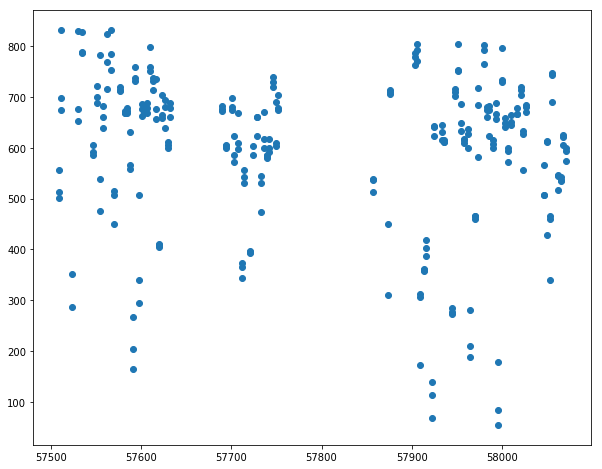

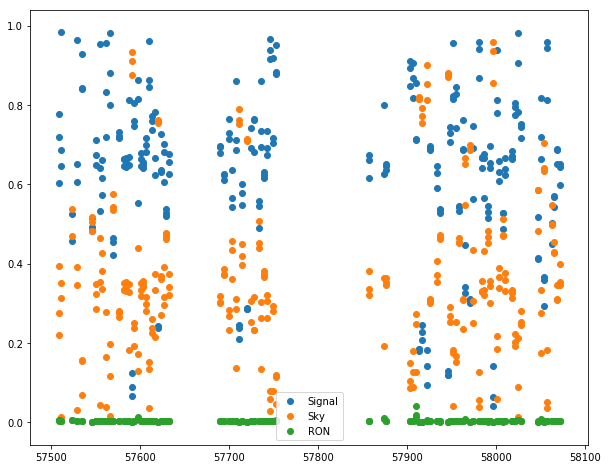

[ 501.6543806   555.59856879  512.45059984  832.60576008  675.31191636
  698.14391906           nan           nan           nan           nan
           nan           nan  352.24540077  285.93175712           nan
  652.21574241  675.74339338  830.24269659  786.762183    788.19440521
  828.92857375  605.5138792   592.1104002   585.96347625  700.88000736
  687.83984332  721.93375916  538.34011336  475.29172787  783.40111213
  681.94318517  701.53862569  803.94163404  753.08443941  752.19227717
  686.30519468  648.80575395  633.84233532  610.37066734  614.82673205
  616.68004489  599.86290358  637.39889243  627.9586423   210.5680359
  281.53089326  188.12312444  459.47077104  465.46806169  465.57209497
  717.83605055  582.91065978  684.96974517  791.97288658  803.22665986
  765.81664207  674.47896249  661.4287627   679.55347589  623.9168325
  674.01622843  473.65754181  529.96022641  544.85679025  670.32437287
  598.83907284  617.86959067  583.13341263  579.64631337  586.54153403
  600.15

In [43]:
plt.figure(figsize=(10,8))
plt.scatter(SNR_part_1[:,0],SNR_part_1[:,1])
plt.show()

plt.figure(figsize=(10,8))
plt.scatter(SNR_part_1[:,0],SNR_part_1[:,2],label='Signal')
plt.scatter(SNR_part_1[:,0],SNR_part_1[:,3],label='Sky')
plt.scatter(SNR_part_1[:,0],SNR_part_1[:,4],label='RON')
plt.legend()
#plt.ylim([5*10**(-15),1.*10**(-14)])
plt.show()

print SNR_part_1[:,1]


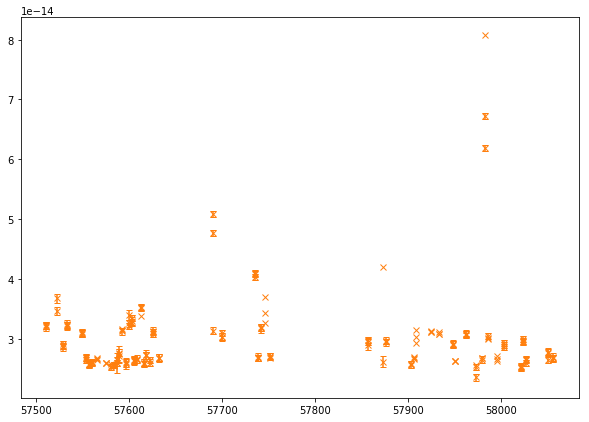

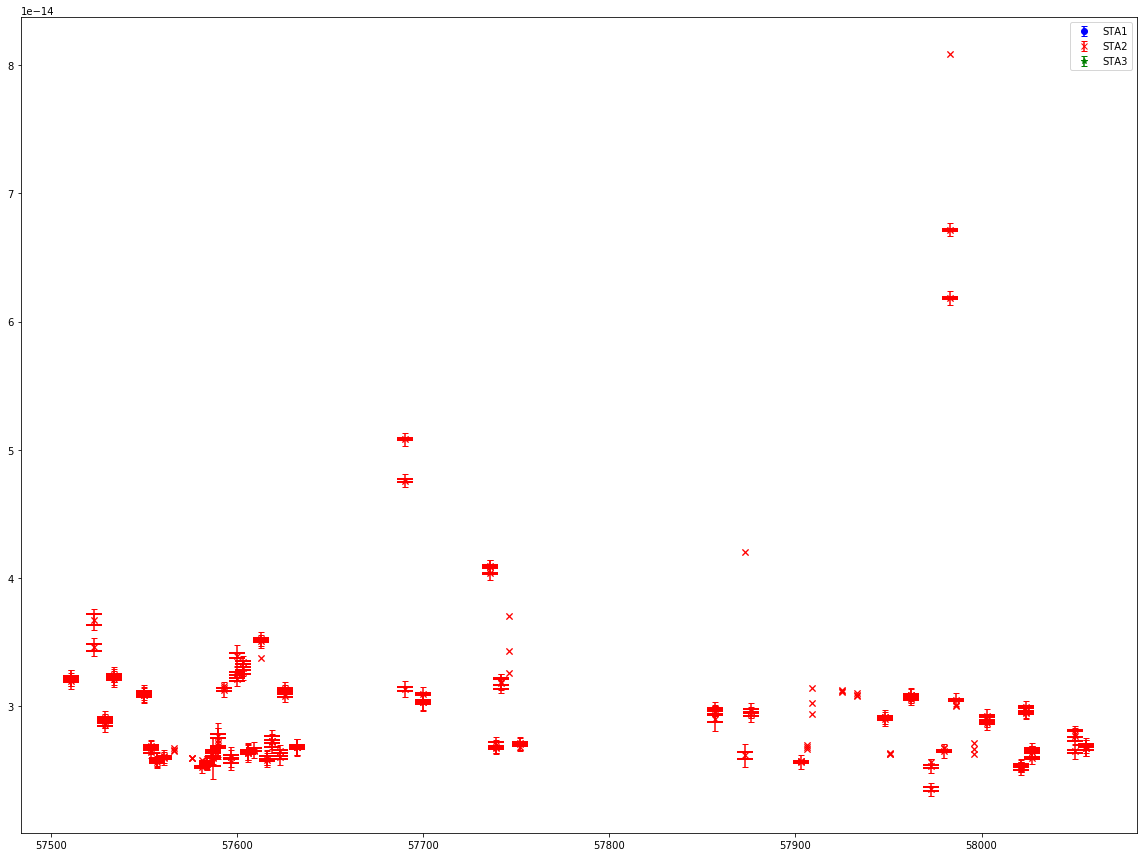

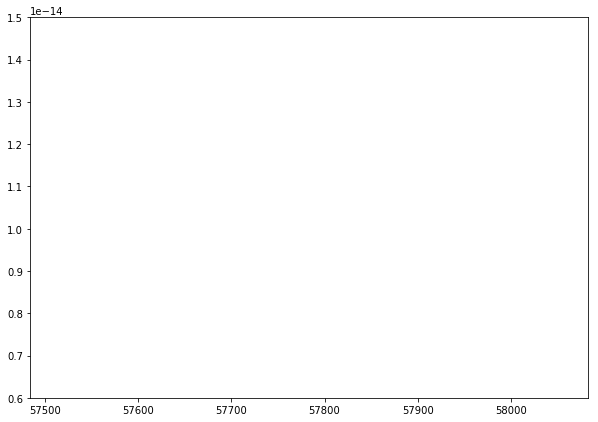

In [44]:

plt.figure(figsize=(10,7))
plt.errorbar(comp_array[:,0],comp_array[:,1],yerr=noise_quasar_1[:,1],fmt='o',capsize=3)
plt.errorbar(comp_array[:,0],comp_array[:,2],yerr=noise_quasar_1[:,2],fmt='x',capsize=3)
plt.errorbar(comp_array[:,0],comp_array[:,3],yerr=noise_quasar_1[:,3],fmt='*',capsize=3)
#plt.ylim([3*10**(-15),0.45*10**(-14)])
plt.show()

plt.figure(figsize=(20,15))
plt.errorbar(comp_array[:,0],comp_array[:,1],yerr=noise_quasar_1[:,1],fmt='o',capsize=3,color='b',label='STA1')
plt.errorbar(comp_array[:,0],comp_array[:,2],yerr=noise_quasar_1[:,2],fmt='x',capsize=3,color='r',label='STA2')
plt.errorbar(comp_array[:,0],comp_array[:,3],yerr=noise_quasar_1[:,3],fmt='*',capsize=3,color='g',label='STA3')
plt.errorbar(comp_array[:,0],comp_array[:,1],yerr=noise_quasar_1[:,4],fmt='o',capsize=8,capthick=2,color='b')
plt.errorbar(comp_array[:,0],comp_array[:,2],yerr=noise_quasar_1[:,5],fmt='x',capsize=8,capthick=2,color='r')
plt.errorbar(comp_array[:,0],comp_array[:,3],yerr=noise_quasar_1[:,6],fmt='*',capsize=8,capthick=2,color='g')
plt.legend()
#plt.ylim([3*10**(-15),0.45*10**(-14)])
plt.show()

plt.figure(figsize=(10,7))
plt.scatter(comp_array[:,0],comp_array[:,1])
plt.scatter(comp_array[:,0],comp_array[:,2])
plt.scatter(comp_array[:,0],comp_array[:,3])
plt.ylim([6*10**(-15),1.5*10**(-14)])
plt.show()

np.savetxt('../NOVEMBER/NGC7213_NOISE_i.txt',noise_quasar_1)
np.savetxt('../NOVEMBER/NOV-NGC7213-i',comp_array)
np.savetxt('../NOVEMBER/NGC7213_SNR_i.txt',SNR_part_1)

In [45]:
flucompsta1,flucompsta2,flucompsta3,flucompsta4,flucompsta5,flucompsta6,flucompsta7,\
SNR1,SNR2,SNR3,SNR4,SNR5,SNR_comp,ABS_FLUX_LAMBDA_1,ABS_FLUX_LAMBDA_2,ABS_FLUX_LAMBDA_3,ABS_FLUX_V_1,\
ABS_FLUX_V_2,ABS_FLUX_V_3,date,poissonAGN,poissonHD,poisson22,poisson529,SNR_test,file1,SNR_part \
= AGNflux(quasJ,0.001)

NameError: name 'AGNflux' is not defined

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(comp_array[:,0],comp_array[:,4])
plt.show()

print comp_array[:,4]

In [ ]:
plt.figure(figsize=(20,14))
plt.scatter(date,np.array(ABS_FLUX_LAMBDA_1),marker='x',\
            color='b',label='Flux found from HD101274')
plt.scatter(date,np.array(ABS_FLUX_LAMBDA_2),marker='x',\
            color='r',label='Flux found from Tycho-2 7740-22-1')
plt.scatter(date_1,np.array(ABS_FLUX_LAMBDA_3),marker='x',\
            color='g',label='Flux found from Tycho-2 7740-529-1')
plt.scatter(date_1,ABS_FLUX_LAMBDA_1_1,marker='o',\
            color='b',label='Flux found from SEX HD101274')
plt.scatter(date_1,np.array(ABS_FLUX_LAMBDA_2_1),marker='o',\
            color='r',label='Flux found from SEX Tycho-2 7740-22-1')
plt.scatter(date_1,np.array(ABS_FLUX_LAMBDA_3_1),marker='o',\
            color='g',label='Flux found from Tycho-2 7740-529-1')
plt.xlabel('Days')
plt.ylabel('Flux (F_LAMBDA) (K-band)')
plt.title('Aperture 0.001 deg')
#plt.yscale('log')
plt.ylim([0.85*10**(-14),1.4*10**(-14)])
plt.legend()
plt.show()

plt.figure(figsize=(20,14))
plt.scatter(date,np.array(SNR1),marker='x',\
            color='b',label='Flux found from HD101274')
plt.xlabel('Days')
plt.ylabel('Flux (F_LAMBDA) (K-band)')
plt.title('Aperture 0.001 deg')
#plt.yscale('log')
#plt.ylim([0.15,0.20])
#plt.xlim([57850,57880])
plt.legend()
plt.show()



In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(SNR_part[:,0],SNR_part[:,1])
plt.show()

plt.figure(figsize=(10,7))
plt.scatter(SNR_part[:,0],SNR_part[:,4])
plt.show()

plt.figure(figsize=(10,7))
plt.scatter(SNR_part_1[:,0],SNR_part_1[:,1])
plt.show()

plt.figure(figsize=(10,7))
plt.scatter(SNR_part[:,0],SNR_part[:,2])
plt.show()

plt.figure(figsize=(10,7))
plt.scatter(SNR_part_1[:,0],SNR_part_1[:,2])
plt.show()

plt.figure(figsize=(10,7))
plt.scatter(SNR_part[:,0],SNR_part[:,3])
plt.show()

plt.figure(figsize=(10,7))
plt.scatter(SNR_part_1[:,0],SNR_part_1[:,3])
plt.show()


In [ ]:
print np.argmax(SNR_test[:,1])

for i in range(len(file1)):
    print i, '{0:f}'.format(SNR_test[i,0]), '{0:f}'.format(SNR_test[i,1]), '{0:f}'.format(SNR_test[i,2])
    print file1[i]